### Download Data

The data is taken from http://archive.ics.uci.edu/ml/machine-learning-databases/00240/, but you can have it in the form of the UCI-HAR-Dataset.zip.

Extract it to the folder of your notebook with the solution (or suitably adjust the paths to training and test data specified below (TRAIN, TEST).  

Spcifically, the split into training and testing data is already done. The dataset contains 7352 training and 2947 test samples.  

Each sample consists of nine timeseries of float values, each of length 128.

The nine timeseries are collected by an accelerometer and a gyroscope that contain information about the motion and the orientation, respectively.

In [1]:
import os

import numpy as np
import matplotlib
import matplotlib.pyplot as plt

### Load Data

In [2]:
# Useful Constants
TRAIN = "UCI_HAR_Dataset/train/"
TEST = "UCI_HAR_Dataset/test/"

# x-values, 'signals'
# Those are separate normalised input features for the neural network
INPUT_SIGNAL_TYPES = [
    "body_acc_x_",
    "body_acc_y_",
    "body_acc_z_",
    "body_gyro_x_",
    "body_gyro_y_",
    "body_gyro_z_",
    "total_acc_x_",
    "total_acc_y_",
    "total_acc_z_"
]
X_train_signals_paths = [TRAIN + "Inertial Signals/" + signal + "train.txt" for signal in INPUT_SIGNAL_TYPES]
X_test_signals_paths =  [TEST  + "Inertial Signals/" + signal + "test.txt"  for signal in INPUT_SIGNAL_TYPES]


# y-values, 'labels'
#Output classes to learn how to classify
LABELS = [
    "WALKING",
    "WALKING_UPSTAIRS",
    "WALKING_DOWNSTAIRS",
    "SITTING",
    "STANDING",
    "LAYING"
]
N_CLASSES = len(LABELS)
y_train_path = TRAIN + "y_train.txt"
y_test_path  = TEST  + "y_test.txt"

In [3]:
# Load "X" (the neural network's training and testing inputs)
def load_X(X_signals_paths):
    X_signals = []
    for signal_type_path in X_signals_paths:
        file = open(signal_type_path, 'r')
        # Read dataset from disk, dealing with text files' syntax
        X_signals.append(
            [np.array(serie, dtype=np.float32) for serie in [
                row.replace('  ', ' ').strip().split(' ') for row in file
            ]]
        )
        file.close()
    return np.transpose(np.array(X_signals), (1, 2, 0))

X_train = load_X(X_train_signals_paths)
X_test = load_X(X_test_signals_paths)
print(X_train.shape, X_test.shape)

(7352, 128, 9) (2947, 128, 9)


In [4]:
# Load "y" (the neural network's training and testing outputs)
def load_y(y_path):
    file = open(y_path, 'r')
    # Read dataset from disk, dealing with text file's syntax
    y_ = np.array(
        [elem for elem in [
            row.replace('  ', ' ').strip().split(' ') for row in file
        ]],
        dtype=np.int32
    )
    file.close()
    # Substract 1 to each output class for friendly 0-based indexing
    return y_ - 1

def one_hot(y, n_classes):
    y = y.reshape(len(y))
    return np.eye(n_classes)[np.array(y, dtype=np.int32)]

def label_from_onehot(vectors):
    indices = []
    for vector in vectors:
        indices.append(np.argmax(vector))
    return np.array(indices)

Y_train = load_y(y_train_path)
Y_test = load_y(y_test_path)
print(Y_train.shape, Y_test.shape)

(7352, 1) (2947, 1)


#### Plot some samples

In [5]:
X_train_per_class = {}
for c in range(N_CLASSES):
    mask = ... # select sample of given class c
    X_train_per_class[c] = X_train[mask]

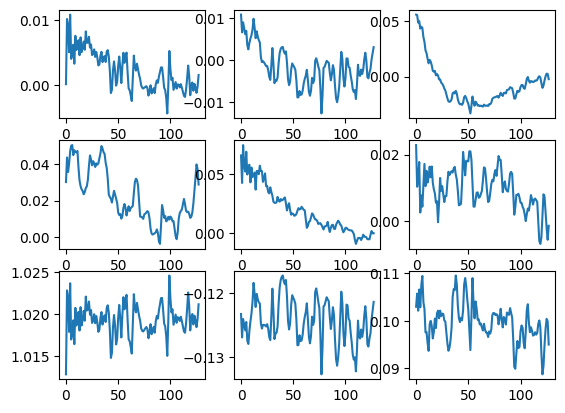

In [6]:
def plot_lines(X, nsamples):
    t = range(128)
    for i in range(9):
        plt.subplot(3,3,i+1)
        for j in range(np.minimum(X.shape[0],nsamples)):
            plt.plot(t,X[j,:,i])
    plt.show()
    
plot_lines(X_train_per_class[1], 1)

In [7]:
# Input Data
training_data_count = len(X_train)  # 7352 training series (with 50% overlap between each serie)
test_data_count = len(X_test)  # 2947 testing series
means = np.mean(X_train, axis=(0,1))
stdevs = np.std(X_train, axis=(0,1))

print("X shape, Y_shape:")
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)
print()
print("Mean / Stdev for each feature:")
for i in range(9):
    print("%7.4f | %7.4f"%(means[i], stdevs[i]))

X shape, Y_shape:
(7352, 128, 9) (7352, 1)
(2947, 128, 9) (2947, 1)

Mean / Stdev for each feature:
-0.0006 |  0.1948
-0.0003 |  0.1224
-0.0003 |  0.1069
 0.0005 |  0.4068
-0.0008 |  0.3819
 0.0001 |  0.2557
 0.8047 |  0.4141
 0.0288 |  0.3910
 0.0865 |  0.3578


### Dataset

If suitable specify Dataset (e.g. in PyTorch).

In [96]:
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN, LSTM, Conv2D, Dropout, Flatten
from keras.optimizers import Adam, RMSprop

print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  0


### Normalization

...

In [9]:
X_train_norm = (X_train - means)/stdevs
X_test_norm = (X_test - means)/stdevs

Y_train = keras.utils.to_categorical(Y_train)
Y_test = keras.utils.to_categorical(Y_test)

## Specify and Train Models

Try different architectures to solve the activity recognition problem.

At minimum implement
* Model with a single layer of SimpleRNN
* Model with a single layer of LSTM
* Model with several layers of LSTMs
* Model with several CNN layers
* MLP

Try with different number of units. Add regularisation if needed (e.g. when working with MLPs).

Report about your findings.

### Single Layer SimpleRNN

In [36]:
### START YOUR CODE
n_input = 9
n_steps = 128
n_hidden = 64

model = Sequential()
model.add(SimpleRNN(units=n_hidden, return_sequences=False, activation='relu', input_shape=(n_steps, n_input)))
model.add(Dense(N_CLASSES, activation='softmax'))

optimizer= Adam()
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics = ['accuracy'])
model.summary()
### END YOUR CODE

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_7 (SimpleRNN)    (None, 64)                4736      
                                                                 
 dense_7 (Dense)             (None, 6)                 390       
                                                                 
Total params: 5126 (20.02 KB)
Trainable params: 5126 (20.02 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [37]:
### START YOUR CODE
batch_size = 128
n_epochs = 50
log = model.fit(X_train_norm, Y_train, batch_size=batch_size, epochs=n_epochs, validation_split=0.2)


Epoch 1/50
46/46 [==============================] - 1s 13ms/step - loss: 1.3672 - accuracy: 0.4943 - val_loss: 1.0158 - val_accuracy: 0.6336
Epoch 2/50
46/46 [==============================] - 0s 11ms/step - loss: 0.9242 - accuracy: 0.6963 - val_loss: 0.8669 - val_accuracy: 0.7458
Epoch 3/50
46/46 [==============================] - 0s 11ms/step - loss: 0.6163 - accuracy: 0.7909 - val_loss: 0.8012 - val_accuracy: 0.7430
Epoch 4/50
46/46 [==============================] - 0s 11ms/step - loss: 0.4734 - accuracy: 0.8124 - val_loss: 0.6160 - val_accuracy: 0.7927
Epoch 5/50
46/46 [==============================] - 1s 11ms/step - loss: 0.4794 - accuracy: 0.8157 - val_loss: 0.7963 - val_accuracy: 0.8035
Epoch 6/50
46/46 [==============================] - 1s 13ms/step - loss: 0.3661 - accuracy: 0.8538 - val_loss: 0.6128 - val_accuracy: 0.7743
Epoch 7/50
46/46 [==============================] - 1s 13ms/step - loss: 0.3446 - accuracy: 0.8633 - val_loss: 0.8107 - val_accuracy: 0.8090
Epoch 8/50
46

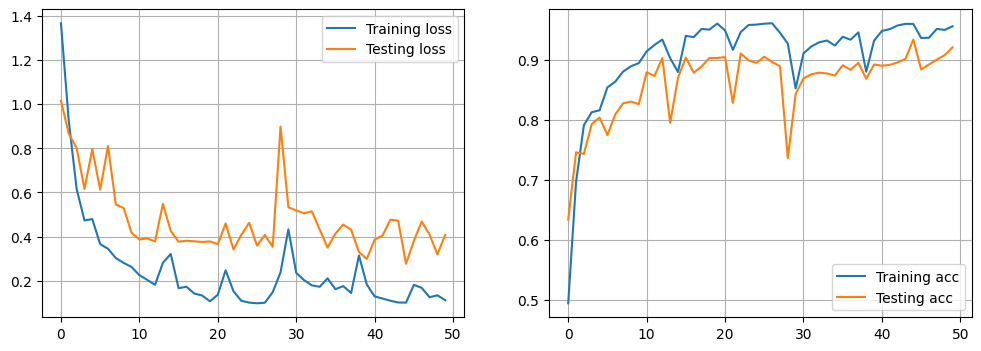

In [38]:
def plot_log(log):
    f = plt.figure(figsize=(12,4))
    ax1 = f.add_subplot(121)
    ax2 = f.add_subplot(122)
    ax1.plot(log.history['loss'], label='Training loss')
    ax1.plot(log.history['val_loss'], label='Testing loss')
    ax1.legend()
    ax1.grid()
    ax2.plot(log.history['accuracy'], label='Training acc')
    ax2.plot(log.history['val_accuracy'], label='Testing acc')
    ax2.legend()
    ax2.grid()

plot_log(log)

In [39]:
model.evaluate(X_test_norm, Y_test)

93/93 [==============================] - 0s 2ms/step - loss: 0.2789 - accuracy: 0.9094


[0.2789371907711029, 0.9093993902206421]

#### Findings
- Normalized vs Unnormalized Data: The model reaches better accuracy and lower loss on normalized data
- Using ReLU as activation instead of tanh significantly reduces exploding gradients
- A higher number of hidden layers leads to more exploding gradients and lossspikes in training, however the test accuarcy is still slightly better
- The model, although very simple, already reaches test accuracies of ~88%

### LSTM

In [86]:
### START YOUR CODE
n_hidden = 64

model = Sequential()
model.add(LSTM(units=n_hidden, return_sequences=False, activation='tanh', input_shape=(n_steps, n_input)))
model.add(Dense(N_CLASSES, activation='softmax'))

optimizer = Adam()
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics = ['accuracy'])
model.summary()

### END YOUR CODE

Model: "sequential_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_15 (LSTM)              (None, 64)                18944     
                                                                 
 dense_23 (Dense)            (None, 6)                 390       
                                                                 
Total params: 19334 (75.52 KB)
Trainable params: 19334 (75.52 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [87]:
### START YOUR CODE
batch_size = 128
n_epochs = 50
log = model.fit(X_train_norm, Y_train, batch_size=batch_size, epochs=n_epochs, validation_split=0.2)


Epoch 1/50
46/46 [==============================] - 3s 52ms/step - loss: 1.2780 - accuracy: 0.5193 - val_loss: 0.7954 - val_accuracy: 0.7036
Epoch 2/50
46/46 [==============================] - 2s 45ms/step - loss: 0.8162 - accuracy: 0.6978 - val_loss: 0.9238 - val_accuracy: 0.6886
Epoch 3/50
46/46 [==============================] - 2s 45ms/step - loss: 0.6256 - accuracy: 0.7849 - val_loss: 0.6156 - val_accuracy: 0.8334
Epoch 4/50
46/46 [==============================] - 2s 45ms/step - loss: 0.4196 - accuracy: 0.8507 - val_loss: 0.4934 - val_accuracy: 0.8708
Epoch 5/50
46/46 [==============================] - 2s 48ms/step - loss: 0.2874 - accuracy: 0.9192 - val_loss: 0.3941 - val_accuracy: 0.9055
Epoch 6/50
46/46 [==============================] - 2s 45ms/step - loss: 0.2536 - accuracy: 0.9097 - val_loss: 0.4049 - val_accuracy: 0.8926
Epoch 7/50
46/46 [==============================] - 2s 44ms/step - loss: 0.2513 - accuracy: 0.9026 - val_loss: 0.3544 - val_accuracy: 0.9137
Epoch 8/50
46

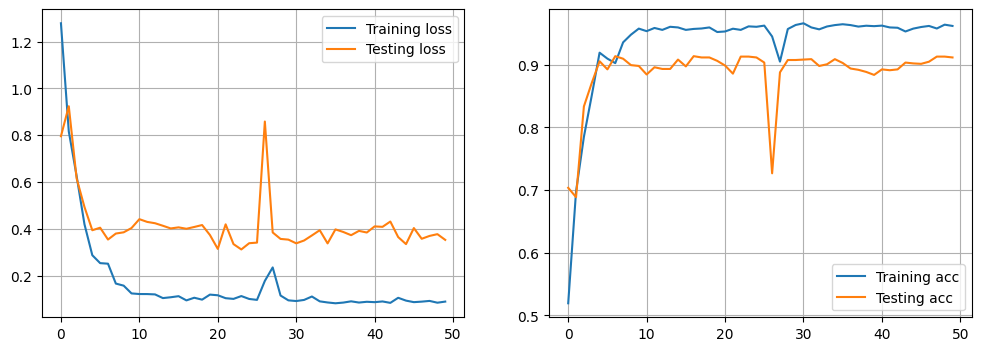

In [88]:
plot_log(log)

In [89]:
model.evaluate(X_test_norm, Y_test)

93/93 [==============================] - 1s 8ms/step - loss: 0.3435 - accuracy: 0.9111


[0.3435378670692444, 0.9110960364341736]

#### Findings

- Training takes way longer due to the additional parameters
- using relu siginificantly reduces performance compared to tanh (70% acc vs 91% acc)
- more hidden layers further increase accuracy
- better test performance than simple RNN


### Stacked LSTMs

In [92]:
### START YOUR CODE
n_hidden = 64

model = Sequential()
model.add(LSTM(units=n_hidden, return_sequences=True, activation='tanh', input_shape=(n_steps, n_input)))
model.add(LSTM(units=n_hidden, return_sequences=True, activation='tanh'))
model.add(LSTM(units=n_hidden, return_sequences=False, activation='tanh'))
model.add(Dense(N_CLASSES, activation='softmax'))

optimizer = Adam()
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics = ['accuracy'])
model.summary()

### END YOUR CODE

Model: "sequential_26"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_20 (LSTM)              (None, 128, 64)           18944     
                                                                 
 lstm_21 (LSTM)              (None, 128, 64)           33024     
                                                                 
 lstm_22 (LSTM)              (None, 64)                33024     
                                                                 
 dense_24 (Dense)            (None, 6)                 390       
                                                                 
Total params: 85382 (333.52 KB)
Trainable params: 85382 (333.52 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [93]:
### START YOUR CODE
batch_size = 128
n_epochs = 50
log = model.fit(X_train_norm, Y_train, batch_size=batch_size, epochs=n_epochs, validation_split=0.2)


Epoch 1/50
46/46 [==============================] - 14s 244ms/step - loss: 0.9729 - accuracy: 0.5982 - val_loss: 0.4961 - val_accuracy: 0.7736
Epoch 2/50
46/46 [==============================] - 10s 225ms/step - loss: 0.2771 - accuracy: 0.9061 - val_loss: 0.2442 - val_accuracy: 0.9198
Epoch 3/50
46/46 [==============================] - 10s 228ms/step - loss: 0.1537 - accuracy: 0.9454 - val_loss: 0.2209 - val_accuracy: 0.9211
Epoch 4/50
46/46 [==============================] - 11s 229ms/step - loss: 0.1247 - accuracy: 0.9565 - val_loss: 0.2318 - val_accuracy: 0.9239
Epoch 5/50
46/46 [==============================] - 10s 227ms/step - loss: 0.1171 - accuracy: 0.9537 - val_loss: 0.2339 - val_accuracy: 0.9021
Epoch 6/50
46/46 [==============================] - 11s 230ms/step - loss: 0.1298 - accuracy: 0.9417 - val_loss: 0.3222 - val_accuracy: 0.9205
Epoch 7/50
46/46 [==============================] - 11s 232ms/step - loss: 0.0924 - accuracy: 0.9633 - val_loss: 0.2528 - val_accuracy: 0.9218

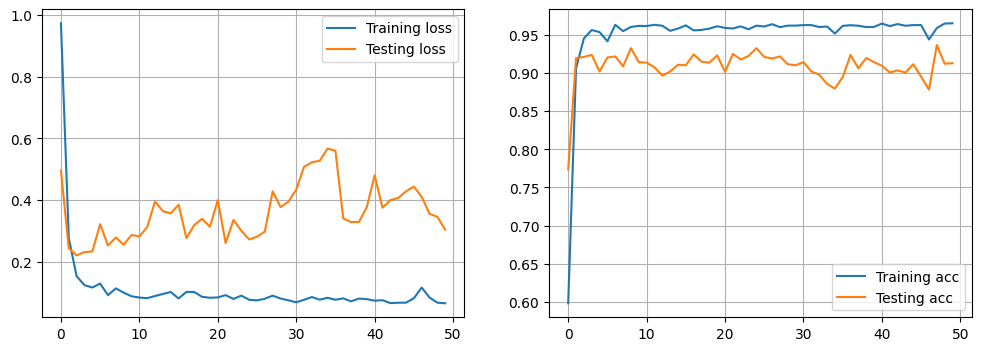

In [94]:
plot_log(log)

In [95]:
model.evaluate(X_test_norm, Y_test)

93/93 [==============================] - 3s 27ms/step - loss: 0.4056 - accuracy: 0.9091


[0.40564239025115967, 0.9090600609779358]

#### Findings

- Simliar performance as single layer LSTM
- Reaches high accuarcy really fast but stays there

### CNN (Conv1d)

In [100]:
### START YOUR CODE
do_rate = 0.3
model = Sequential()
model.add(Conv2D(filters=16, kernel_size=(7,1), strides=(2,1), activation='relu',input_shape=(n_steps, n_input, 1)))
model.add(Dropout(do_rate))
model.add(Conv2D(filters=32, kernel_size=(5,1), strides=(2,1), activation='relu'))
model.add(Dropout(do_rate))
model.add(Conv2D(filters=64, kernel_size=(5,1), strides=(2,1), activation='relu'))
model.add(Dropout(do_rate))
model.add(Conv2D(filters=64, kernel_size=(3,1), strides=(2,1), activation='relu'))
model.add(Flatten())
model.add(Dense(N_CLASSES, activation='softmax'))

optimizer = Adam()
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics = ['accuracy'])
model.summary()
### END YOUR CODE

Model: "sequential_29"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 61, 9, 16)         128       
                                                                 
 dropout_3 (Dropout)         (None, 61, 9, 16)         0         
                                                                 
 conv2d_6 (Conv2D)           (None, 29, 9, 32)         2592      
                                                                 
 dropout_4 (Dropout)         (None, 29, 9, 32)         0         
                                                                 
 conv2d_7 (Conv2D)           (None, 13, 9, 64)         10304     
                                                                 
 dropout_5 (Dropout)         (None, 13, 9, 64)         0         
                                                                 
 conv2d_8 (Conv2D)           (None, 6, 9, 64)        

In [101]:
### START YOUR CODE
batch_size = 128
n_epochs = 50
log = model.fit(X_train_norm, Y_train, batch_size=batch_size, epochs=n_epochs, validation_split=0.2)


Epoch 1/50
46/46 [==============================] - 2s 38ms/step - loss: 0.8536 - accuracy: 0.6125 - val_loss: 0.4591 - val_accuracy: 0.8273
Epoch 2/50
46/46 [==============================] - 2s 37ms/step - loss: 0.2872 - accuracy: 0.8857 - val_loss: 0.3079 - val_accuracy: 0.9150
Epoch 3/50
46/46 [==============================] - 2s 36ms/step - loss: 0.2178 - accuracy: 0.9148 - val_loss: 0.2828 - val_accuracy: 0.9218
Epoch 4/50
46/46 [==============================] - 2s 35ms/step - loss: 0.1875 - accuracy: 0.9238 - val_loss: 0.2922 - val_accuracy: 0.9232
Epoch 5/50
46/46 [==============================] - 2s 37ms/step - loss: 0.1696 - accuracy: 0.9313 - val_loss: 0.2772 - val_accuracy: 0.9279
Epoch 6/50
46/46 [==============================] - 2s 39ms/step - loss: 0.1583 - accuracy: 0.9328 - val_loss: 0.2962 - val_accuracy: 0.9293
Epoch 7/50
46/46 [==============================] - 2s 38ms/step - loss: 0.1433 - accuracy: 0.9415 - val_loss: 0.2630 - val_accuracy: 0.9218
Epoch 8/50
46

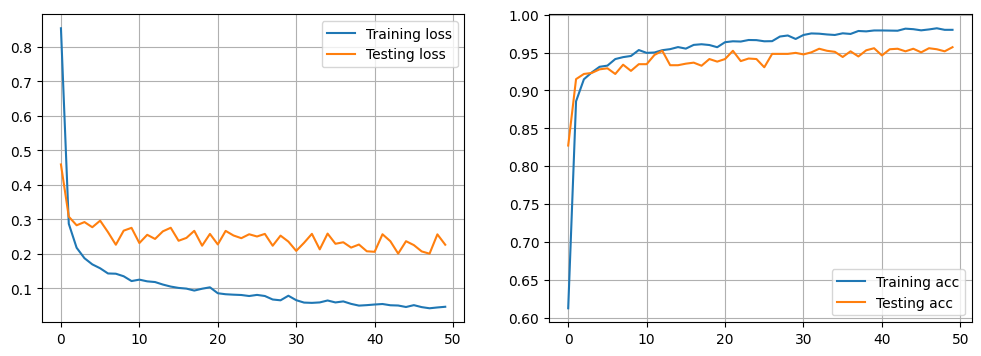

In [102]:
plot_log(log)

In [103]:
model.evaluate(X_test_norm, Y_test)

93/93 [==============================] - 0s 3ms/step - loss: 0.2984 - accuracy: 0.9352


[0.29838481545448303, 0.935188353061676]

#### Findings

- Very stable
- Quick training
- Best results so far

### MLP

In [155]:
### START YOUR CODE

model = model = Sequential()
model.add(Flatten(input_shape = (n_steps, n_input)))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(16, activation='relu'))
model.add(Dense(N_CLASSES, activation='softmax'))

optimizer = RMSprop(clipnorm = 0.1)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics = ['accuracy'])
model.summary()

### END YOUR CODE

Model: "sequential_46"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_18 (Flatten)        (None, 1152)              0         
                                                                 
 dense_97 (Dense)            (None, 32)                36896     
                                                                 
 dropout_6 (Dropout)         (None, 32)                0         
                                                                 
 dense_98 (Dense)            (None, 16)                528       
                                                                 
 dense_99 (Dense)            (None, 6)                 102       
                                                                 
Total params: 37526 (146.59 KB)
Trainable params: 37526 (146.59 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [156]:
### START YOUR CODE
batch_size = 128
n_epochs = 50
log = model.fit(X_train_norm, Y_train, batch_size=batch_size, epochs=n_epochs, validation_split=0.2)

Epoch 1/50
46/46 [==============================] - 0s 3ms/step - loss: 1.1776 - accuracy: 0.5696 - val_loss: 0.7398 - val_accuracy: 0.8083
Epoch 2/50
46/46 [==============================] - 0s 2ms/step - loss: 0.6453 - accuracy: 0.7960 - val_loss: 0.4610 - val_accuracy: 0.8681
Epoch 3/50
46/46 [==============================] - 0s 2ms/step - loss: 0.4475 - accuracy: 0.8459 - val_loss: 0.3446 - val_accuracy: 0.9014
Epoch 4/50
46/46 [==============================] - 0s 2ms/step - loss: 0.3572 - accuracy: 0.8720 - val_loss: 0.3192 - val_accuracy: 0.9001
Epoch 5/50
46/46 [==============================] - 0s 2ms/step - loss: 0.3011 - accuracy: 0.8920 - val_loss: 0.2735 - val_accuracy: 0.9171
Epoch 6/50
46/46 [==============================] - 0s 2ms/step - loss: 0.2639 - accuracy: 0.9027 - val_loss: 0.2922 - val_accuracy: 0.9055
Epoch 7/50
46/46 [==============================] - 0s 2ms/step - loss: 0.2545 - accuracy: 0.9046 - val_loss: 0.2661 - val_accuracy: 0.9103
Epoch 8/50
46/46 [==

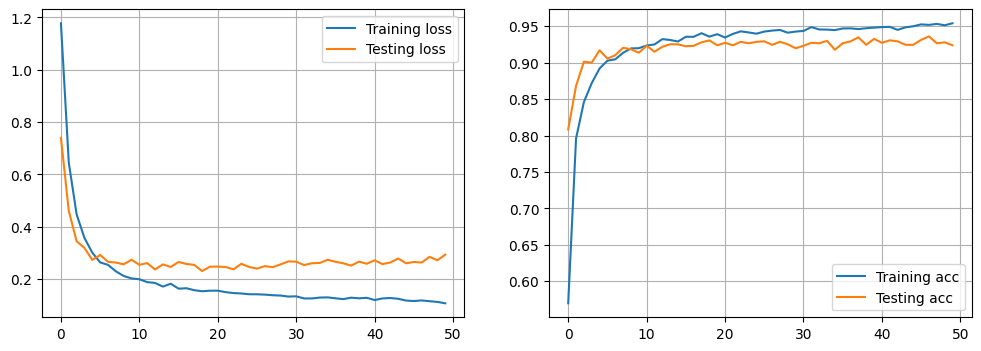

In [157]:
plot_log(log)

In [159]:
model.evaluate(X_test_norm, Y_test)

93/93 [==============================] - 0s 690us/step - loss: 0.5720 - accuracy: 0.8914


[0.5719546675682068, 0.891414999961853]

#### Findings

- Surprisingly solid accuracy for this simple approach
- Overfits really quickly, needs some regularization
